In [ ]:
# Author: Kevin Joslin 
# Date Created: 4/11/2018
# This is the first attempt at building an HH model similar to what NeuroDyn uses.
# As it is clearly shown, the model uses Brian2
# It's basis is taken from the Brian2 website and has been modified by me
# base code taken from http://brian2.readthedocs.io/en/stable/examples/compartmental.hodgkin_huxley_1952.html 

from brian2 import *
from numpy import *
%matplotlib inline

start_scope()

#Define Number of Neurons

N=4

#Define Initial Conditions for Hodgkin-Huxley Equations
#Most of these are taken from the base code defined above

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2
c = 1000*nfarad/cm**2
I_e = 0.1
v_r = 0*mV

# Define the Differential Equations
# These are the Hodgkin-Huxley Equations 

eqs = '''

dv/dt = (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Ie)/c : volt

Ie : amp/meter**2 # applied current

dm/dt = alpham * (1-m) - betam * m : 1

dn/dt = alphan * (1-n) - betan * n : 1

dh/dt = alphah * (1-h) - betah * h : 1

alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz

betam = 4 * exp(-v/(18*mV))/ms : Hz

alphah = 0.07 * exp(-v/(20*mV))/ms : Hz

betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz

alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz

betan = 0.125*exp(-v/(80*mV))/ms : Hz

#betan = 0.125*(exp((-0.0125/mV)*(v+65*mV)))/ms : Hz

gNa : siemens/meter**2

'''

# Define the NeuronGroup along with threshold and reset voltages
# The rese and threshold voltages are not needed in the HH case

G = NeuronGroup(N, eqs, threshold = 'v > 0.2*volt', reset = 'v = 0*volt', method = 'exponential_euler')
#G = NeuronGroup(N, eqs, method = 'exponential_euler')

# Hodgkin Huxley Parameters

G.v = [0,0,0,0]*mV
G.v = G.v + rand(len(G))*mV
print(G.v[:])
G.h = [0,0,0,1.1]
G.m = [0,0,0,0]
G.n = [0,0,0,0.5]
G.Ie = [0.09,0,0,0.12]*amp/meter**2
G.gNa = [gNa0,gNa0,gNa0,gNa0]

# Synapse Attempt
# 
S = Synapses(G, G, on_pre='v_post += 0.1*volt')
S.connect(i=0, j=1)

# Turn on State and Spike Monitors

spikemon = SpikeMonitor(G)
statemon = StateMonitor(G,'v', record=True)

# Set Simulation Length

run(100*ms)

#Attempt at Adding Noise
#This method is failing for some reason, the two vectors will not
#add to each other, more Python knowledge is required I think

statemon.v[0] = statemon.v[0] + rand(len(statemon.v[0]))*mV

# Plot Results

figure(1)
plot(statemon.t/ms,statemon.v[0],'b',label = 'Neuron 0')
plot(statemon.t/ms,statemon.v[1],'g',label = 'Neuron 1')
plot(statemon.t/ms,statemon.v[2],'m',label = 'Neuron 2')
plot(statemon.t/ms,statemon.v[3],'r',label = 'Neuron 3')
ylabel('Membrane Potential (V)', fontsize = 18)
xlabel('Time (ms)', fontsize=24)
title('All Four HH Neurons', fontsize = 20)
legend();

figure(2)
plot(statemon.t/ms,statemon.v[0],'b')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 0',fontsize = 24)

figure(3)
plot(statemon.t/ms,statemon.v[1],'g',label = 'Neuron 1')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 1',fontsize = 24)

figure(4)
plot(statemon.t/ms,statemon.v[2],'m',label = 'Neuron 2')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 2',fontsize = 24)

figure(5)
plot(statemon.t/ms,statemon.v[3],'r',label = 'Neuron 3')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 3',fontsize = 24)


In [ ]:
#Failed Attempt to Add Noise to the statemon.v[i] Vectors

print(statemon.v[0][1])
for i in range(N-1):
    statemon.v[i] = statemon.v[i] + rand(len(statemon.v[i]))*mV
print(statemon.v[0][1])

In [ ]:
# Author: Kevin Joslin 
# Date Created: 4/11/2018
# This is the first attempt at building an HH model similar to what NeuroDyn uses.
# As it is clearly shown, the model uses Brian2
# It's basis is taken from the Brian2 website and has been modified by me
# base code taken from http://brian2.readthedocs.io/en/stable/examples/compartmental.hodgkin_huxley_1952.html 

from brian2 import *
from numpy import *
%matplotlib inline

start_scope()

#Define Number of Neurons

N=4

#Define Initial Conditions for Hodgkin-Huxley Equations
#Most of these are taken from the base code defined above

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
ESyn = 0*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2
c = 1000*nfarad/cm**2
tauSyn = 10*ms
#I_c = 1 * uA
Ic = 0.1*amp/meter**2
#v_r = 0*mV


# Define the Differential Equations
# These are the Hodgkin-Huxley Equations 

eqs = '''

dv/dt = (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + IE + ISyn)/c : volt

IE : amp/meter**2 # applied current

ISyn = gSyn*(ESyn-v): amp/meter**2 # synaptic current 

dgSyn/dt = -gSyn/tauSyn : siemens/meter**2

dm/dt = alpham * (1-m) - betam * m : 1

dn/dt = alphan * (1-n) - betan * n : 1

dh/dt = alphah * (1-h) - betah * h : 1

alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz

betam = 4 * exp(-v/(18*mV))/ms : Hz

alphah = 0.07 * exp(-v/(20*mV))/ms : Hz

betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz

alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz

betan = 0.125*exp(-v/(80*mV))/ms : Hz

#betan = 0.125*(exp((-0.0125/mV)*(v+65*mV)))/ms : Hz

gNa : siemens/meter**2

'''


# Define the NeuronGroup along with threshold and reset voltages
# The rese and threshold voltages are not needed in the HH case

G = NeuronGroup(N, eqs, threshold = 'v > 0.2*volt', reset = 'v = 0*volt', method = 'exponential_euler')
#G = NeuronGroup(N, eqs, method = 'exponential_euler')



# Hodgkin Huxley Parameters

G.v = [0,0,0,0]*mV
#G.v = G.v + 100*rand(len(G))*mV
G.h = [0,0,0,0]
G.m = [0,0,0,0]
G.n = [0,0,0,0]
G.IE = [0.1,0.1,0.1,0]*amp/meter**2
G.gNa = [gNa0,gNa0,gNa0,gNa0]
G.gSyn = [2,0,0,0]*siemens/meter**2

# Synapse Attempt
# add model of the synapse, this goes to the Synapses group
# the gap junction model on Brian2

S = Synapses(G, G)
S.connect(i=0, j=1)

# Turn on State and Spike Monitors

spikemon = SpikeMonitor(G)
statemon = StateMonitor(G,'v', record=True)

# Set Simulation Length

run(125*ms)

#Attempt at Adding Noise
#This method is failing for some reason, the two vectors will not
#add to each other, more Python knowledge is required I think

statemon.v[0] = statemon.v[0] + rand(len(statemon.v[0]))*mV

# Plot Results

figure(1)
plot(statemon.t/ms,statemon.v[0],'b',label = 'Neuron 0')
plot(statemon.t/ms,statemon.v[1],'g',label = 'Neuron 1')
plot(statemon.t/ms,statemon.v[2],'m',label = 'Neuron 2')
plot(statemon.t/ms,statemon.v[3],'r',label = 'Neuron 3')
ylabel('Membrane Potential (V)', fontsize = 18)
xlabel('Time (ms)', fontsize=24)
title('All Four HH Neurons', fontsize = 20)
legend();

figure(2)
plot(statemon.t/ms,statemon.v[0],'b')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 0',fontsize = 24)

figure(3)
plot(statemon.t/ms,statemon.v[1],'g',label = 'Neuron 1')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 1',fontsize = 24)

figure(4)
plot(statemon.t/ms,statemon.v[2],'m',label = 'Neuron 2')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 2',fontsize = 24)

figure(5)
plot(statemon.t/ms,statemon.v[3],'r',label = 'Neuron 3')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 3',fontsize = 24)



<class 'brian2.groups.neurongroup.NeuronGroup'>


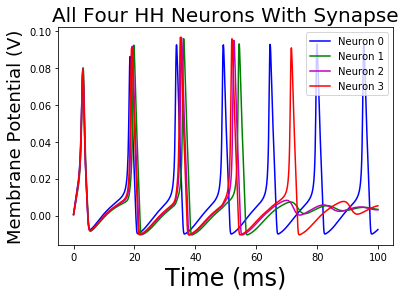

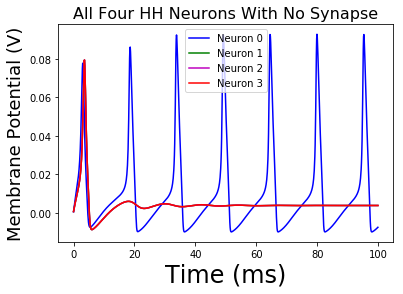

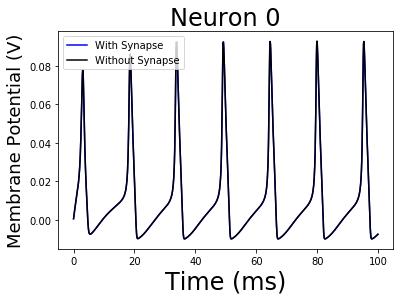

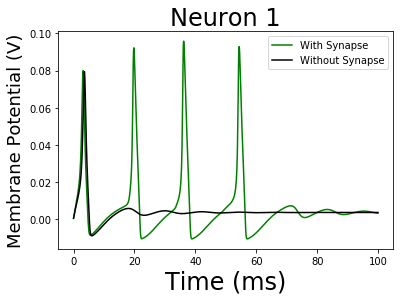

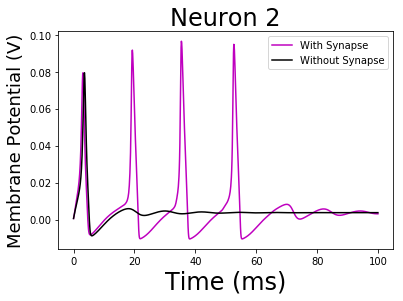

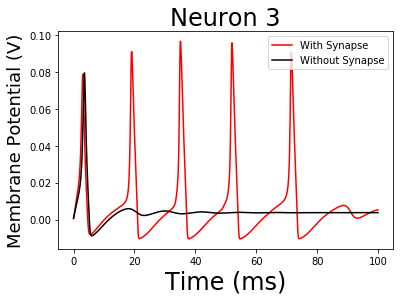

In [538]:

# Author: Kevin Joslin 
# Date Created: 4/11/2018
# This is the first attempt at building an HH model similar to what NeuroDyn uses.
# As it is clearly shown, the model uses Brian2
# It's basis is taken from the Brian2 website and has been modified by me
# base code taken from http://brian2.readthedocs.io/en/stable/examples/compartmental.hodgkin_huxley_1952.html 

from brian2 import *
from numpy import *
%matplotlib inline

start_scope()

# Define Number of Neurons

N=4

# Define Initial Conditions for Hodgkin-Huxley Equations
# Most of these are taken from the base code defined above
# and do not reflect realistic values

El = 10.613*mV #Membrane Leak potential
ENa = 115*mV #Sodium Membrane Potential
EK = -12*mV #Potassium Membrane Potential
ESyn = 0*volt #Potential From Synapse? (0 V)
gl = 0.3*msiemens/cm**2 #Leakage Conductance
gNa0 = 120*msiemens/cm**2 #Sodium Conductance
gK = 36*msiemens/cm**2 #Potassium Conductance
c = 1000*nfarad/cm**2 #Capacitance of Cell Membrane
tauSyn = 10*ms #Synaptic Time Constant
gSyn0 = 15*siemens/meter**2 #Synaptic Conductance, ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2042540/
Ic = 0.1 #Standard Injected Current Value


# Define the Differential Equations
# These are the Hodgkin-Huxley Equations 

eqs = '''

dv/dt = (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + IE + ISyn)/c : volt

IE : amp/meter**2 # applied current

ISyn : amp/meter**2

dm/dt = alpham * (1-m) - betam * m : 1

dn/dt = alphan * (1-n) - betan * n : 1

dh/dt = alphah * (1-h) - betah * h : 1

alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz

betam = 4 * exp(-v/(18*mV))/ms : Hz

alphah = 0.07 * exp(-v/(20*mV))/ms : Hz

betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz

alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz

betan = 0.125*exp(-v/(80*mV))/ms : Hz

#betan = 0.125*(exp((-0.0125/mV)*(v+65*mV)))/ms : Hz

gNa : siemens/meter**2

'''

# Define the Connected and Unconnected NeuronGroups along with appropriate threshold voltage

connected = NeuronGroup(N, eqs, threshold='v > 0.083*volt', method = 'exponential_euler')
unconnected = NeuronGroup(N, eqs, threshold='v > 0.083*volt', method = 'exponential_euler')

# Hodgkin Huxley Parameters

connected.v = [0,0,0,0]*mV
connected.h = [0,0,0,0]
connected.m = [0,0,0,0]
connected.n = [0,0,0,0]
connected.IE = [Ic,Ic-0.04,Ic-0.04,Ic-0.04]*amp/meter**2 
connected.gNa = [gNa0,gNa0,gNa0,gNa0]

# Small Amount of Added Noise
connected.v = connected.v + 1*rand(len(neurons))*mV 

# Define Same Parameters for the Unconnected Neurons
unconnected.v = connected.v
unconnected.h = connected.h
unconnected.m = connected.m
unconnected.n = connected.n
unconnected.IE = connected.IE
unconnected.gNa = connected.gNa

# Synapses

# Synapse 1 (Gap Junction Model)
# _____________

# S=Synapses(neurons,model='''w:1 # gap junction conductance
#                             ISyn_post = w*(v_pre-v_post): amp/meter**2 (summed)''')
# S.connect(i=0,j=[1,2,3])
# S.w = '0.5*j'


# Synapse 2 (Fred's Synapse)
# _____________

syn2Eqs = '''
w:1
ISyn_post = w*gSyn*(v_pre-v_post): amp/meter**2 (summed) # synaptic current
dgSyn/dt = -gSyn/tauSyn : siemens/meter**2
'''

S = Synapses(connected, model = syn2Eqs, method = 'exponential_euler')
# S.connect(i=0,j=[1,2,3])
S.connect(i=0,j=[1,2,3])
S.w = 'j'
S.gSyn = gSyn0

# Synapse 3 (Basic Voltage Boost)
# _____________

# S = Synapses(neurons, neurons, on_pre='v_post += 0.03*volt')
# S.connect(i=0, j=1)

# Synapse 4 (Weighted Voltage Boost)
# _____________

# S = Synapses(neurons, neurons, 'w : volt', on_pre='v_post += w')
# S.connect(i=0, j=[1, 2, 3])
# S.w = '0.02*j*volt'


# Turn on State and Spike Monitors

spikemon = SpikeMonitor(connected,variables='v')
statemon = StateMonitor(connected,'v', record=True)
statemon2 = StateMonitor(unconnected,'v', record = True)

# Set Simulation Length

run(100*ms)

# Plot Results

figure(1)
plot(statemon.t/ms,statemon.v[0],'b',label = 'Neuron 0')
plot(statemon.t/ms,statemon.v[1],'g',label = 'Neuron 1')
plot(statemon.t/ms,statemon.v[2],'m',label = 'Neuron 2')
plot(statemon.t/ms,statemon.v[3],'r',label = 'Neuron 3')
ylabel('Membrane Potential (V)', fontsize = 18)
xlabel('Time (ms)', fontsize=24)
title('All Four HH Neurons With Synapse', fontsize = 20)
legend();

figure(2)
plot(statemon2.t/ms,statemon2.v[0],'b',label = 'Neuron 0')
plot(statemon2.t/ms,statemon2.v[1],'g',label = 'Neuron 1')
plot(statemon2.t/ms,statemon2.v[2],'m',label = 'Neuron 2')
plot(statemon2.t/ms,statemon2.v[3],'r',label = 'Neuron 3')
ylabel('Membrane Potential (V)', fontsize = 18)
xlabel('Time (ms)', fontsize=24)
title('All Four HH Neurons With No Synapse', fontsize = 16)
legend();

figure(3)
plot(statemon.t/ms,statemon.v[0],'b',label = 'With Synapse')
plot(statemon2.t/ms,statemon2.v[0],'k',label = 'Without Synapse')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 0',fontsize = 24)
legend();

figure(4)
plot(statemon.t/ms,statemon.v[1],'g',label = 'With Synapse')
plot(statemon2.t/ms,statemon2.v[1],'k',label = 'Without Synapse')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 1',fontsize = 24)
legend();

figure(5)
plot(statemon.t/ms,statemon.v[2],'m',label = 'With Synapse')
plot(statemon2.t/ms,statemon2.v[2],'k',label = 'Without Synapse')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 2',fontsize = 24)
legend();

figure(6)
plot(statemon.t/ms,statemon.v[3],'r',label = 'With Synapse')
plot(statemon2.t/ms,statemon2.v[3],'k',label = 'Without Synapse')
xlabel('Time (ms)', fontsize=24)
ylabel('Membrane Potential (V)', fontsize = 18)
title('Neuron 3',fontsize = 24)
legend();
